<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/observed.csv")

In [ ]:
df.head()

,week,Month,Year,Rainfall
0,1,JAN,1993,0.8020
1,2,JAN,1993,1.6121
2,3,JAN,1993,0.3287
3,4,JAN,1993,0.0845
4,1,FEB,1993,0.0000


In [ ]:
df.fillna(value = 0,inplace =True)

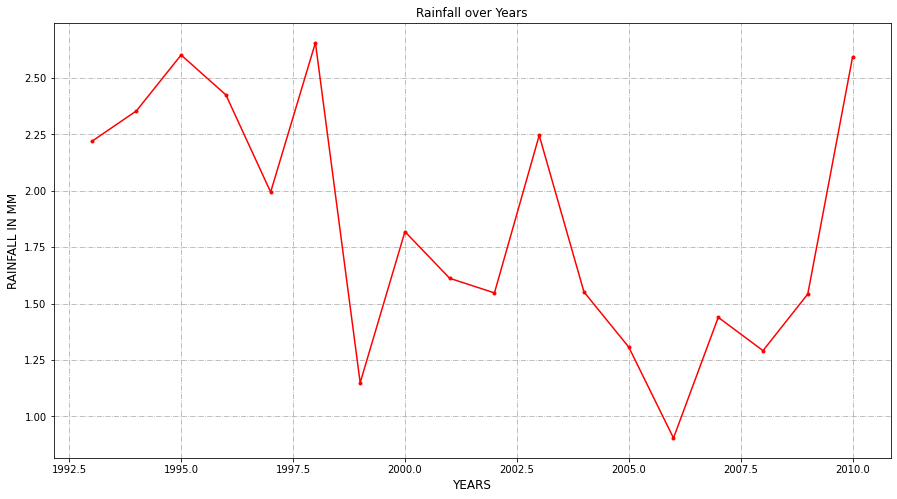

In [ ]:
plt.figure(figsize=(15,8))
df.groupby(['Year']).mean()['Rainfall'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

In [ ]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,week,Month,Year,Rainfall
0,1,1,1993,0.8020
1,2,1,1993,1.6121
2,3,1,1993,0.3287
3,4,1,1993,0.0845
4,1,2,1993,0.0000
5,2,2,1993,0.0000
6,3,2,1993,0.3025
7,4,2,1993,2.3859
8,1,3,1993,0.0000
9,2,3,1993,0.8799


In [ ]:
X=np.asanyarray(df[['week','Month','Year']]).astype('int')
y=np.asanyarray(df['Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(864, 3)
(864,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 2.5525475098141635
MSE: 18.578843935676336
RMSE: 4.310318310249991

-------Train Data--------
MAE: 2.2077429596666955
MSE: 13.299678671905415
RMSE: 3.6468724507316423

-----Training Accuracy-------
2.1
-----Testing Accuracy--------
-0.3


In [ ]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [ ]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [ ]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.823076923076923
MSE: 21.846153846153847
RMSE: 4.673986932604096

-------Train Data--------
MAE: 1.531456953642384
MSE: 15.928807947019868
RMSE: 3.9910910722532837

-----Training Accuracy-------
70.7
-----Testing Accuracy--------
70.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 2.027177588870204
MSE: 15.025331713769502
RMSE: 3.8762522768480254

-------Train Data--------
MAE: 1.4474484361013975
MSE: 7.577607558616421
RMSE: 2.752745458377222


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
44.2
-----------Testing Accuracy------------
18.9


In [ ]:
predicted = random_forest_model.predict([[4,6,2016]]) #forcast for week 4 of june 2016

In [ ]:
predicted

array([2.18133016])

In [ ]:
predicted = random_forest_model.predict([[1,7,2016]]) # forecast for week 1 june 2016

In [ ]:
predicted

array([4.50232144])